# Wind Energy Analysis in Ireland

This notebook presents an analysis of historical wind speed data from Met Éireann.
The purpose of the analysis is to explore wind speed patterns and assess their potential relevance for wind energy generation in Ireland.


## Project Structure

This analysis follows a standard data analytics workflow:
1. Data Acquisition
2. Data Cleaning
3. Data Analysis
4. Data Presentation


## 1. Data Acquisition


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Our file has some meta information at the top we want to skip.
# So we need to find the line number where the actual data starts.
with open("data/MeanWindSpeed_hourly.csv", "r") as f:
    for i, line in enumerate(f):
        if line.count(",") > 10:
            skip_rows = i
            break

df = pd.read_csv("data/MeanWindSpeed_hourly.csv", skiprows=skip_rows)

df.head(3)

/tmp/ipykernel_2643/3013138847.py:11: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/MeanWindSpeed_hourly.csv", skiprows=skip_rows)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-jan-1945 00:00,2,0.0,0,4.9,0,4.6,4.4,8.2,95,...,1,0,1,0,50,4,0.0,200,2,8
1,01-jan-1945 01:00,3,0.0,0,5.1,0,4.9,4.4,8.5,97,...,1,0,1,0,45,4,0.0,200,2,8
2,01-jan-1945 02:00,2,0.0,0,5.1,0,4.8,4.4,8.5,97,...,1,0,1,0,50,4,0.0,4800,4,8


In [2]:
df.columns

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')

## 2. Data Cleaning


In [6]:
df['DateTime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
df[['date', 'DateTime']].head(3)

,date,DateTime
0,01-jan-1945 00:00,1945-01-01 00:00:00
1,01-jan-1945 01:00,1945-01-01 01:00:00
2,01-jan-1945 02:00,1945-01-01 02:00:00


In [7]:
# Rename the 'wdsp' column to 'WindSpeed' for clarity.
df = df.rename(columns={'wdsp': 'WindSpeed'})
df[['WindSpeed']].head()

,WindSpeed
0,0
1,0
2,0
3,0
4,7


In [8]:
# New DataFrame with only DateTime and WindSpeed columns
wind_df = df[['DateTime', 'WindSpeed']].copy()
wind_df.describe()

,DateTime,WindSpeed
count,709297,709297.000000
mean,1985-06-17 00:00:00.000000064,10.114264
min,1945-01-01 00:00:00,0.000000
25%,1965-03-25 12:00:00,6.000000
50%,1985-06-17 00:00:00,9.000000
75%,2005-09-08 12:00:00,14.000000
max,2025-12-01 00:00:00,46.000000
std,NaN,5.680150


## 3. Data Analysis


In [ ]:
wind_df['Year'] = wind_df['DateTime'].dt.year
wind_df['Month'] = wind_df['DateTime'].dt.month

# Display the first 5 rows of the updated DataFrame
wind_df[['DateTime', 'Year', 'Month', 'WindSpeed']].head(5)

,DateTime,Year,Month,WindSpeed
0,1945-01-01 00:00:00,1945,1,0
1,1945-01-01 01:00:00,1945,1,0
2,1945-01-01 02:00:00,1945,1,0
3,1945-01-01 03:00:00,1945,1,0
4,1945-01-01 04:00:00,1945,1,7


In [ ]:
yearly_wind = wind_df.groupby('Year')['WindSpeed'].mean()


<class 'pandas.core.series.Series'>


## 4. Data Presentation


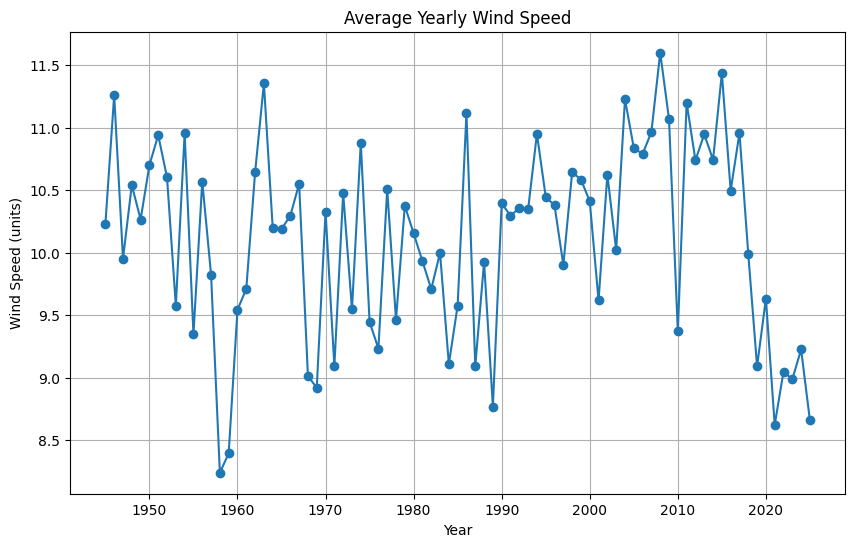

In [15]:
# PLotting the yearly average wind speed.
plt.figure(figsize=(10, 6))
plt.plot(yearly_wind.index, yearly_wind.values, marker='o')
plt.title('Average Yearly Wind Speed')
plt.xlabel('Year')
plt.ylabel('Wind Speed (units)')
plt.grid(True)
plt.show()